<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Цель исследования** — разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию

**Ход исследования**

О качестве данных известно, что, как минимум, не требуется предобработка, однако, все равно проверим повторно.

Таким образом, исследование пройдёт в три этапа:

1) Обзор данных.

2) Предобработка данных.

3) Анализ.


## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

Откроем файл и изучим документацию:

In [3]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Каждый объект в наборе данных — это информация о пользователя страховой компании «Хоть потоп». Известно:

* пол 
* возраст 
* зарплата 
* члены семьи 
* страховые выплаты 

Пропусков нет!

## Исследование данных

Оценим аномальность параметров:

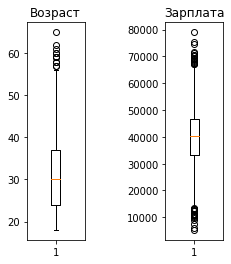

In [7]:
fig = plt.figure()

ax_1 = fig.add_subplot(1, 5, 1)
ax_2 = fig.add_subplot(1, 5, 3)

ax_1.boxplot(df['Возраст']);
ax_1.set_title('Возраст');
ax_2.boxplot(df['Зарплата']);
ax_2.set_title('Зарплата');


Все "выбросы" более-менее близки к реальности, поэтому ограничивать параметры мы не будем.

Оценим связь параметров:

In [6]:
corr_0 = df.corr()
corr_0.style.background_gradient(cmap='coolwarm')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


Заметим, что сильную связь между собой имеют параметры "Возраст" и "Страховые выплаты". Скорее всего, это связано с тем, что люди в возрасте больше подвержены рискам различных заболеваний.  

Посмотрим на распределение полов:

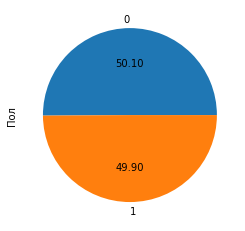

In [16]:
autopct = "%.2f"
df['Пол'].value_counts().plot.pie(autopct=autopct);

Соотношение мужчин и женщин стремится к 1!

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество модели не изменится, ибо вектор предсказаний не меняется в ходе преобразований:

**Обоснование:** 


Пусть:
$$
a = X w
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} (XP)^T y
$$
$$
w' = P^{-1} (X^T X)^{-1} ((P^T)^{-1}(P)^T) X^T y
$$
$$
w' = P^{-1} (X^T X)^{-1}X^T y
$$
$$
w' = P^{-1} w
$$

Проверим утверждения на практике:

In [5]:
#разделим данные на выборки
X = df.drop("Страховые выплаты", axis=1)
y = df["Страховые выплаты"]

In [6]:
#учитывая, что у нас всего 4 признака без таргета, то матрица должна быть 4х4
randomchik = np.random.rand(4,4)

#проверим, обратима ли матрица
np.linalg.inv(randomchik)

array([[-1.31601504e+00, -3.67898020e-03, -1.06350288e+00,
         2.29658044e+00],
       [ 3.64529832e+00,  2.07964797e+00, -4.56709437e-01,
        -4.93429404e+00],
       [-1.87024212e+00,  1.01285403e+01, -1.17977916e+00,
        -9.30171209e+00],
       [-2.21945562e-01, -7.65748259e+00,  2.47734197e+00,
         8.11982735e+00]])

def generate_invertible_matrix(size):
    try:
        matrix = np.random.normal(size=(size, size))
        # проверим матрицу на обратимость, если нет, пробуем сгенерировать еще раз
        # таким образом гарантируем, что матрица стопроцентно будет обратимой
        np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        matrix = generate_invertible_matrix()
    
    return matrix

In [7]:
#обучим модель 
lr = LinearRegression()
lr.fit(X, y)
r2 = lr.score(X, y)
print(f'Качество модели: {r2}')

Качество модели: 0.4249455028666801


In [8]:
#преобразуем Х и снова обучим моедль 
X_new = X @ randomchik

lr = LinearRegression()
lr.fit(X_new, y)
r2 = lr.score(X_new, y)
print(f'Качество модели с преобразованными данными: {r2}')

Качество модели с преобразованными данными: 0.4249455028666931


Качество не изменилось, чтд!

## Алгоритм преобразования

**Алгоритм**

1. Умножим матрицу признаков на 3400
2. Прибавим к матрице 50
3. Умножим на случайную обратимую матрицу A

## Проверка алгоритма

In [9]:
X_new = (X*3400 + 50) @ randomchik

X_new.head()

,0,1,2,3
0,1.086703e+08,1.538175e+08,1.253585e+08,6.610881e+07
1,8.328558e+07,1.178666e+08,9.606276e+07,5.069480e+07
2,4.603225e+07,6.514252e+07,5.309111e+07,2.802522e+07
3,9.133410e+07,1.292948e+08,1.053747e+08,5.554019e+07
4,5.719699e+07,8.095175e+07,6.597335e+07,3.480596e+07


In [10]:
lr = LinearRegression()
lr.fit(X_new, y)
r2 = lr.score(X_new, y)
print(f'Качество модели с преобразованными данными: {r2}')

Качество модели с преобразованными данными: 0.42494550286667976


**Вывод:**

!Качество линейной регрессии никак не поменялось!